<a href="https://colab.research.google.com/github/maurosc3ner/ml_python_playground/blob/main/book_fchollet/dl_chollet_ch4_1_imdb_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Imports

In [3]:
from tensorflow.keras.datasets import imdb
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import numpy as np
(tr_x, tr_y), (te_x,te_y)=imdb.load_data(num_words=10000)


In [4]:
tr_x[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [4]:
print(tr_x.ndim,tr_x.shape)
print(tr_x[0])
print(len(tr_x[0]))

print(tr_y.ndim,tr_y.shape)
print(tr_y[0:5])

1 (25000,)
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
218
1 (25000,)
[1 0 0 1 0]


In [5]:
# word index to text
word_index=imdb.get_word_index()
reverse_word_index=dict(
    [(value,key) for (key,value) in word_index.items()])

decoded_rev=" ".join([
    reverse_word_index.get(i-3,"?") for i in tr_x[0]
])

print(decoded_rev)

decoded_rev=" ".join([
    reverse_word_index.get(i-3,"?") for i in tr_x[1]
])

print(decoded_rev)

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

# Vectorize
Each list has different lenght, you can encode in two ways:

* Padding all lists using the max list length (samples, max_length)
* Multi-hot encoding (put 1 in the position reflected by the word, 10k positions), having a size of (samples,10000)

In [7]:
def vectorizer(sequences,dim=10000):
  results = np.zeros((len(sequences),dim))
  for i, sequence in enumerate(sequences):
    for j in sequence:
      results[i,j]=1.
  return results

tr_x2=vectorizer(tr_x)
te_x2=vectorizer(te_x)
print(tr_x2.ndim,tr_x2.shape)
#print first 10 words
print(tr_x[0])
print(tr_x2[0])

2 (25000, 10000)
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
[0. 1. 1. ... 0. 0. 0.]


In [8]:
tr_y2=np.asarray(tr_y).astype("float32")

te_y2=np.asarray(te_y).astype("float32")
print(tr_y,tr_y2)
print(te_y2)

[1 0 0 ... 0 1 0] [1. 0. 0. ... 0. 1. 0.]
[0. 1. 1. ... 0. 0. 0.]


# Training

In [9]:
m41=tf.keras.Sequential([
    # the hypothesis space, 16 dimensions, the bigger number of neurons the more expensive
    # non linearity capability
    tf.keras.layers.Dense(16,activation="relu"),
    tf.keras.layers.Dense(16,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")])
m41.compile(optimizer="rmsprop",
            loss="binary_crossentropy",
            metrics=["accuracy"])

In [10]:
tf.keras.backend.clear_session()
tf.random.set_seed(123)
np.random.seed(123)

print(tr_x2.shape[0])
#shuffle
#idx=np.random.permutation(tr_x2.shape[0])
#sh_inputs=tr_x2[idx]
#sh_targets=tr_y2[idx]
#val_samples=int(0.7*(tr_x2.shape[0]))

val_samples=10000
tr_inputs=tr_x2[:val_samples]
tr_targets=tr_y2[:val_samples]

val_inputs=tr_x2[:val_samples]
val_targets=tr_y2[:val_samples]

print(tr_inputs.shape,val_inputs.shape)


hist=m41.fit(
    x=tr_inputs,
    y=tr_targets,
    epochs=20,
    batch_size=128,
    validation_data=(val_inputs,val_targets)
)


25000
(15000, 10000) (10000, 10000)
Epoch 1/20
118/118 [==============================] - 7s 15ms/step - loss: 0.4150 - accuracy: 0.8347 - val_loss: 0.2945 - val_accuracy: 0.8860
Epoch 2/20
118/118 [==============================] - 1s 7ms/step - loss: 0.2187 - accuracy: 0.9206 - val_loss: 0.2744 - val_accuracy: 0.8910
Epoch 3/20
118/118 [==============================] - 1s 7ms/step - loss: 0.1611 - accuracy: 0.9409 - val_loss: 0.2898 - val_accuracy: 0.8873
Epoch 4/20
118/118 [==============================] - 1s 8ms/step - loss: 0.1232 - accuracy: 0.9577 - val_loss: 0.3176 - val_accuracy: 0.8832
Epoch 5/20
118/118 [==============================] - 1s 8ms/step - loss: 0.0951 - accuracy: 0.9677 - val_loss: 0.3558 - val_accuracy: 0.8795
Epoch 6/20
118/118 [==============================] - 1s 8ms/step - loss: 0.0714 - accuracy: 0.9761 - val_loss: 0.4018 - val_accuracy: 0.8775
Epoch 7/20
118/118 [==============================] - 1s 8ms/step - loss: 0.0528 - accuracy: 0.9837 - val_loss:

In [36]:
history_dict=hist.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

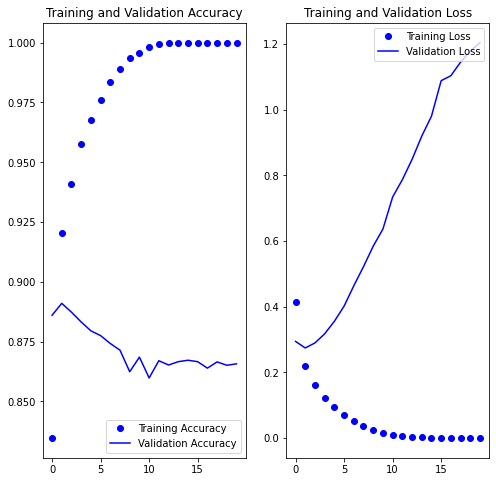

In [11]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']

loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs_range = range(20)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, "bo",label='Training Accuracy')
plt.plot(epochs_range, val_acc,"b", label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, "bo",label='Training Loss')
plt.plot(epochs_range, val_loss, "b",label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Full model

Let's train the model using the full dataset:

In [12]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(tr_x2, tr_y2, epochs=30, batch_size=128)
results = model.evaluate(te_x2, te_y2)

print(results)

Epoch 1/30
196/196 [==============================] - 3s 6ms/step - loss: 0.3443 - accuracy: 0.8558
Epoch 2/30
196/196 [==============================] - 1s 7ms/step - loss: 0.2066 - accuracy: 0.9205
Epoch 3/30
196/196 [==============================] - 1s 7ms/step - loss: 0.1487 - accuracy: 0.9434
Epoch 4/30
196/196 [==============================] - 1s 7ms/step - loss: 0.0986 - accuracy: 0.9647
Epoch 5/30
196/196 [==============================] - 1s 6ms/step - loss: 0.0567 - accuracy: 0.9805
Epoch 6/30
196/196 [==============================] - 1s 6ms/step - loss: 0.0285 - accuracy: 0.9913
Epoch 7/30
196/196 [==============================] - 1s 5ms/step - loss: 0.0152 - accuracy: 0.9962
Epoch 8/30
196/196 [==============================] - 1s 6ms/step - loss: 0.0095 - accuracy: 0.9976
Epoch 9/30
196/196 [==============================] - 1s 6ms/step - loss: 0.0046 - accuracy: 0.9988
Epoch 10/30
196/196 [==============================] - 1s 5ms/step - loss: 0.0024 - accuracy: 0.9995

In [13]:
model.predict(te_x2)

782/782 [==============================] - 2s 2ms/step


array([[1.06374886e-04],
       [1.00000000e+00],
       [9.97315586e-01],
       ...,
       [3.16003396e-04],
       [1.29493527e-08],
       [9.99670148e-01]], dtype=float32)